# **Indexing Images Based on Visual Description**

<div class="align-center">
  <a href="https://getindexify.ai/"><img src="https://getindexify.ai/Indexify_Logo_Wordmark.svg" width="145"></a>
  <a href="https://discord.com/invite/kF8UZACA7r"><img src="https://raw.githubusercontent.com/rishiraj/random/main/Discord%20button.png" width="145"></a><br>
  Join Discord if you need help + ⭐ <i>Star us on <a href="https://github.com/tensorlakeai/indexify">Github</a></i> ⭐
</div>

In this notebook we show how you can index images by visual description. We use a small visual description model called MoonDream. 

Once you setup Indexify, it will continoulsy extract visual descriptions using Moondream and index the description as images are ingested. You can build reliable applications which have to react to images in real-time. The use of such pipelines spans security, retail, and robotics.

## **Setup**

In [ ]:
%pip install indexify indexify-extractor-sdk

# Download Indexify Server
!curl https://getindexify.ai | sh

# Download Extractors
!indexify-extractor download tensorlake/moondream
!indexify-extractor download tensorlake/minilm-l6

After installing the necessary libraries, download the server, and the extractors, you need to restart the runtime. Then, you have to run Indexify Server with the Extractors.

Open 2 terminals and run the following commands:

```bash
# Terminal 1
./indexify server -d

# Terminal 2
indexify-extractor join-server
```

## **Indexing Images**

In [34]:
from indexify import IndexifyClient
client = IndexifyClient()

In [35]:
file_names=[
    "skate.jpg", "congestion.jpg", "bushwick-bred.jpg",
    "141900.jpg", "132500.jpg", "123801.jpg"
    "120701.jpg", "103701.jpg"
]

file_urls = [f"https://extractor-files.diptanu-6d5.workers.dev/images/{file_name}" for file_name in file_names]
for file_url in file_urls:
    content_id = client.ingest_remote_file("image", file_url, "image/png", {})
    client.wait_for_extraction(content_id)

In [ ]:
extraction_graph_spec = """
name: "image"
extraction_policies:
  - extractor: "tensorlake/moondream"
    name: "image_descriptions"

  - extractor: "tensorlake/minilm-l6"
    name: "image_description_embedding_index"
    content_source: "image_descriptions"
"""

extraction_graph = ExtractionGraph.from_yaml(extraction_graph_spec)
client.create_extraction_graph(extraction_graph)                                            

In [ ]:
client.indexes()

In [40]:
result = client.search_index(
    name="image.image_description_embedding_index.embedding",
    query="skateboard",
    top_k=5
)

result

[{'content_id': 'c969a5b1844d73b7',
  'text': 'The image captures a bustling city street scene. A man in a blue striped shirt and a woman in a yellow jacket are walking on the sidewalk, while a man in a black shirt and a woman in a white shirt are riding a skateboard. The street is filled with cars and taxis, and the buildings lining the street are tall and modern, with a green awning visible on one of them. The sky is clear and blue, and the sun is shining brightly, casting a warm glow over the scene.',
  'mime_type': 'text/plain',
  'confidence_score': 1.2513796,
  'labels': {}},
 {'content_id': 'e5c109fe9d24f7dc',
  'text': 'The image depicts a vibrant underwater coral reef scene. The coral, a mix of white and brown, is teeming with life, including several fish in shades of black and white. The fish are scattered throughout the coral, some swimming near the top and others closer to the bottom. The background is a deep blue color, likely the water surrounding the coral reef.',
  'mim

In [41]:
content_ids = [r['content_id'] for r in result]
content_metadata_list = [client.get_content_metadata(content_id) for content_id in content_ids]
parent_ids = [cm['content_metadata']['parent_id'] for cm in content_metadata_list]

In [42]:
parent_ids

['WR2CGS6wh3Wwiyz2',
 'HGqVUfdV62ahZwdx',
 'P8J9Gbt1QMl9p4Yq',
 'sLBgvOCB1NAmWldK',
 'qDj1PuTCispXZM5C']

In [43]:
image_bytes = [client.download_content(parent_id) for parent_id in parent_ids]

In [44]:
from IPython.display import Image
from IPython.display import display

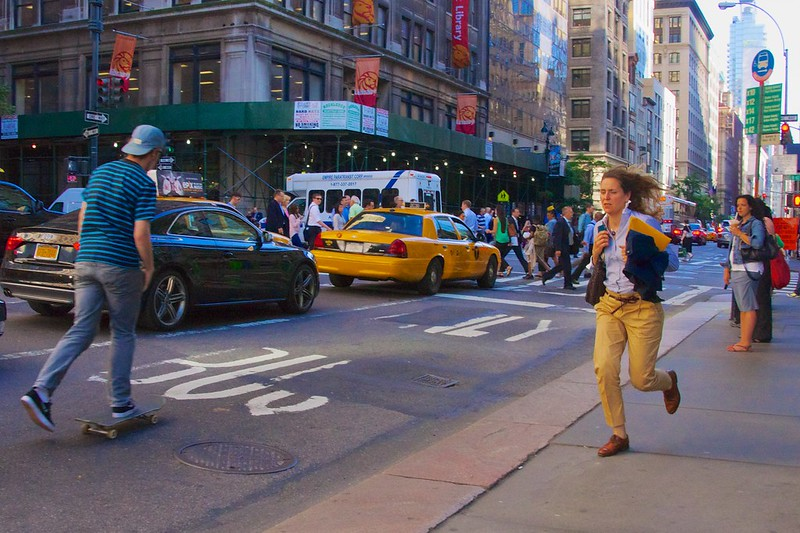

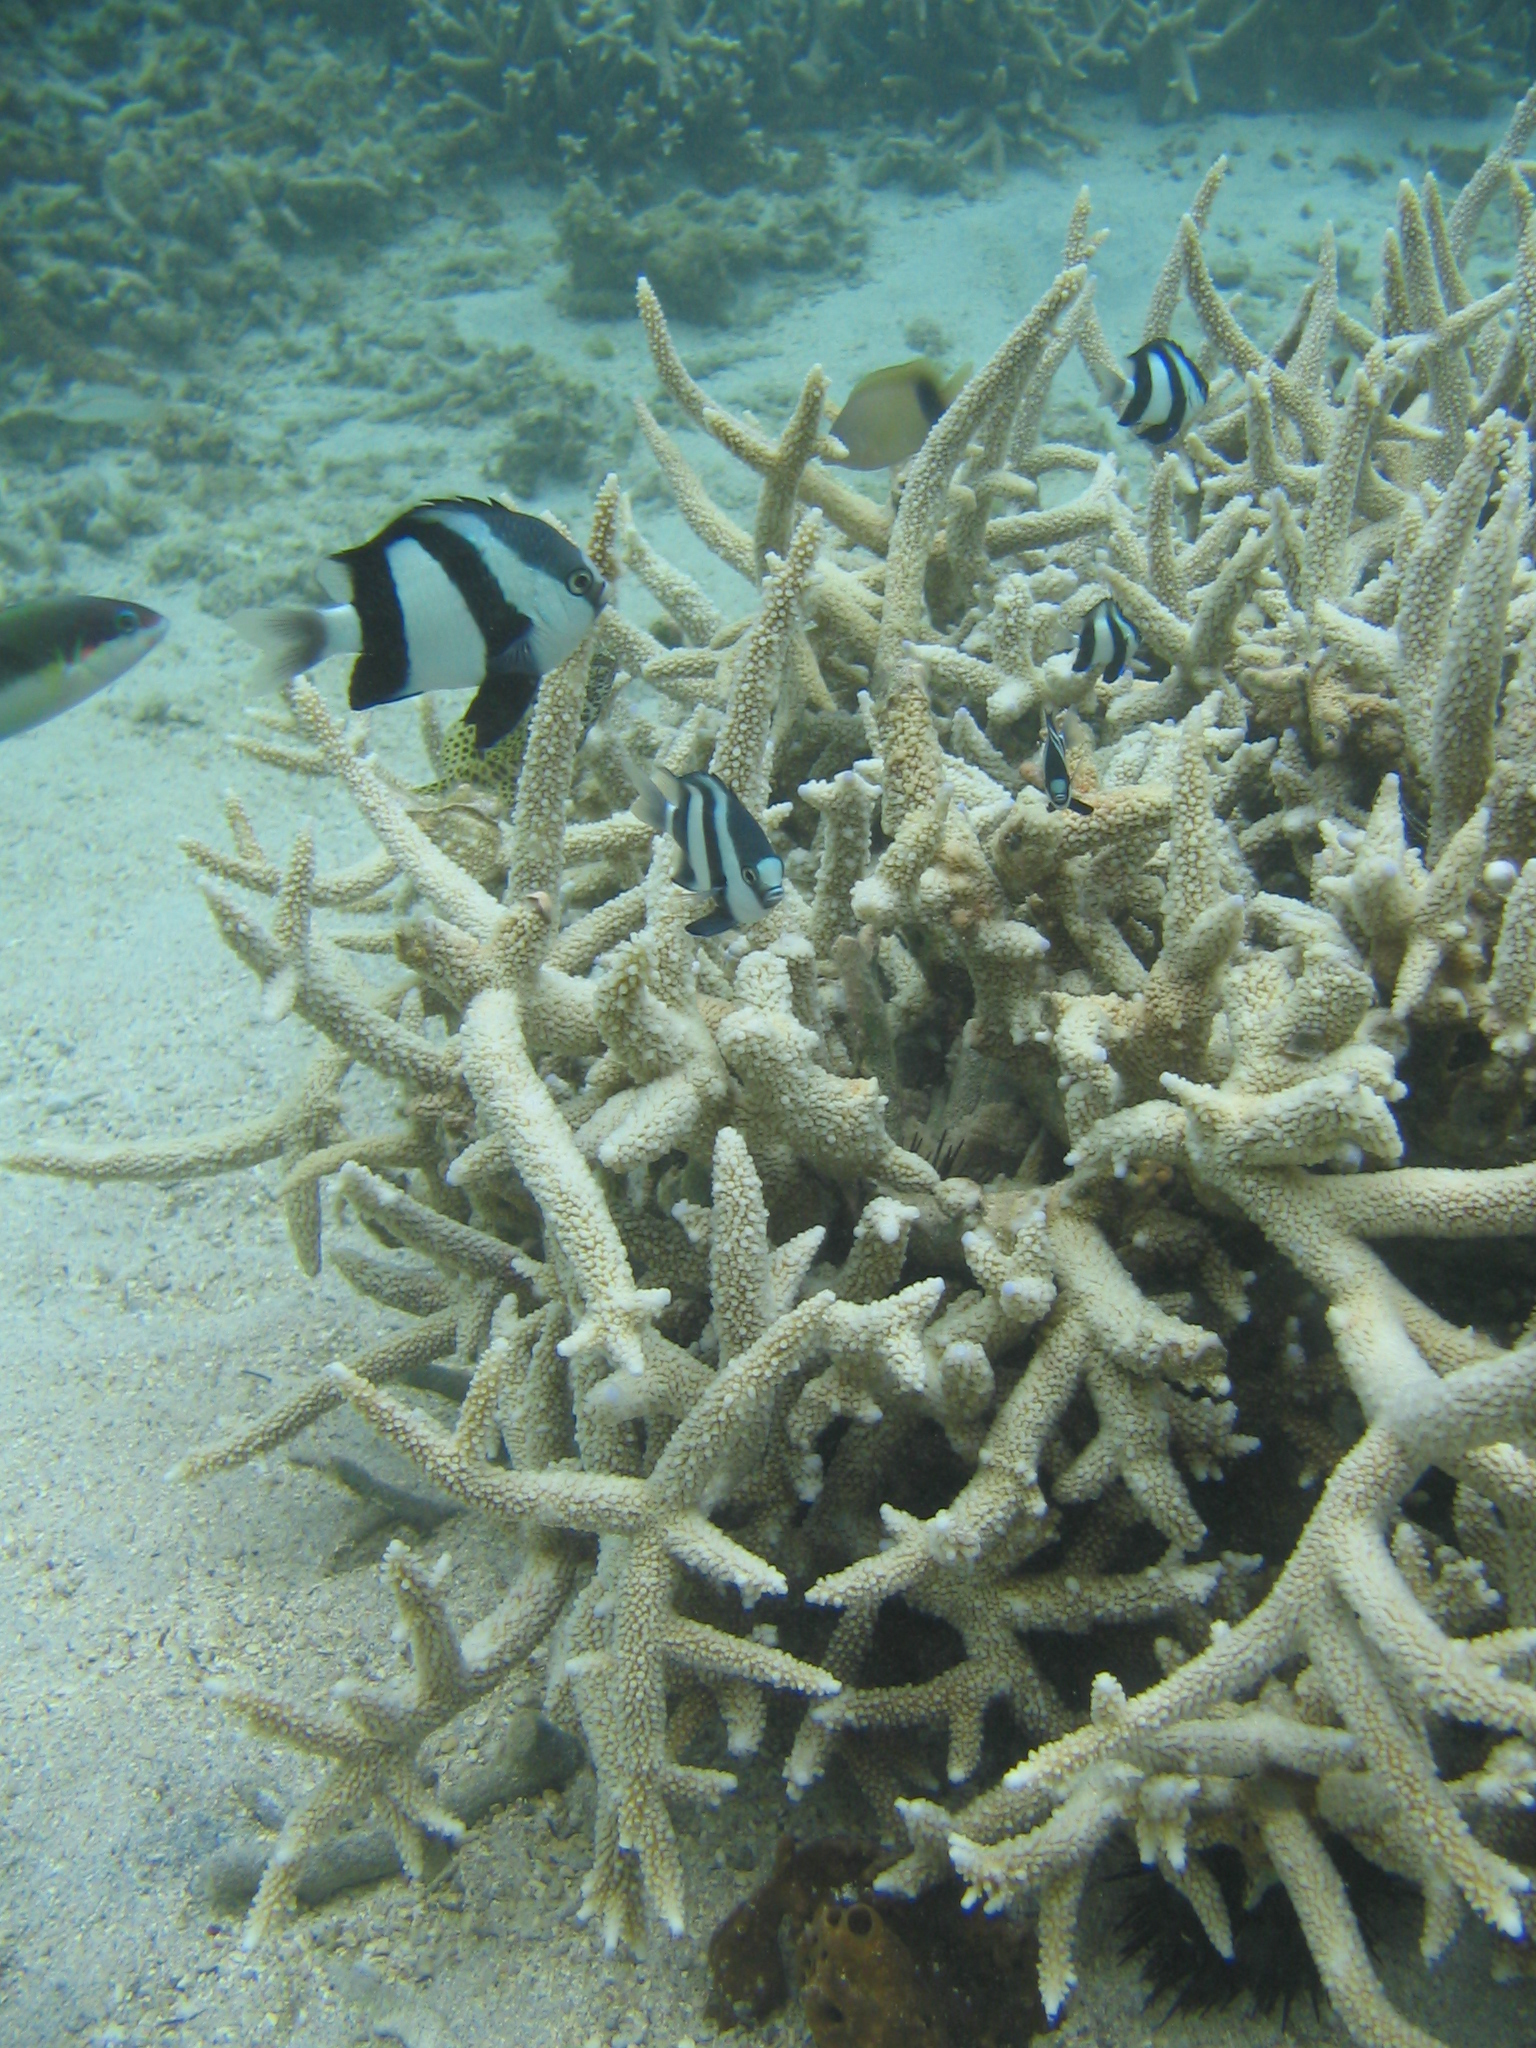

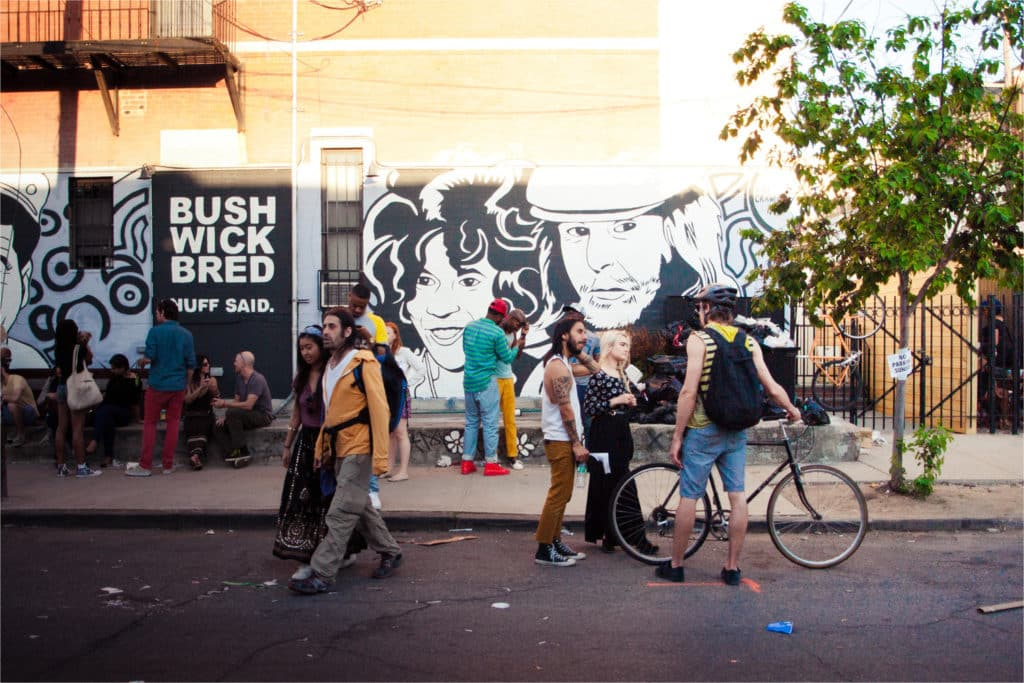

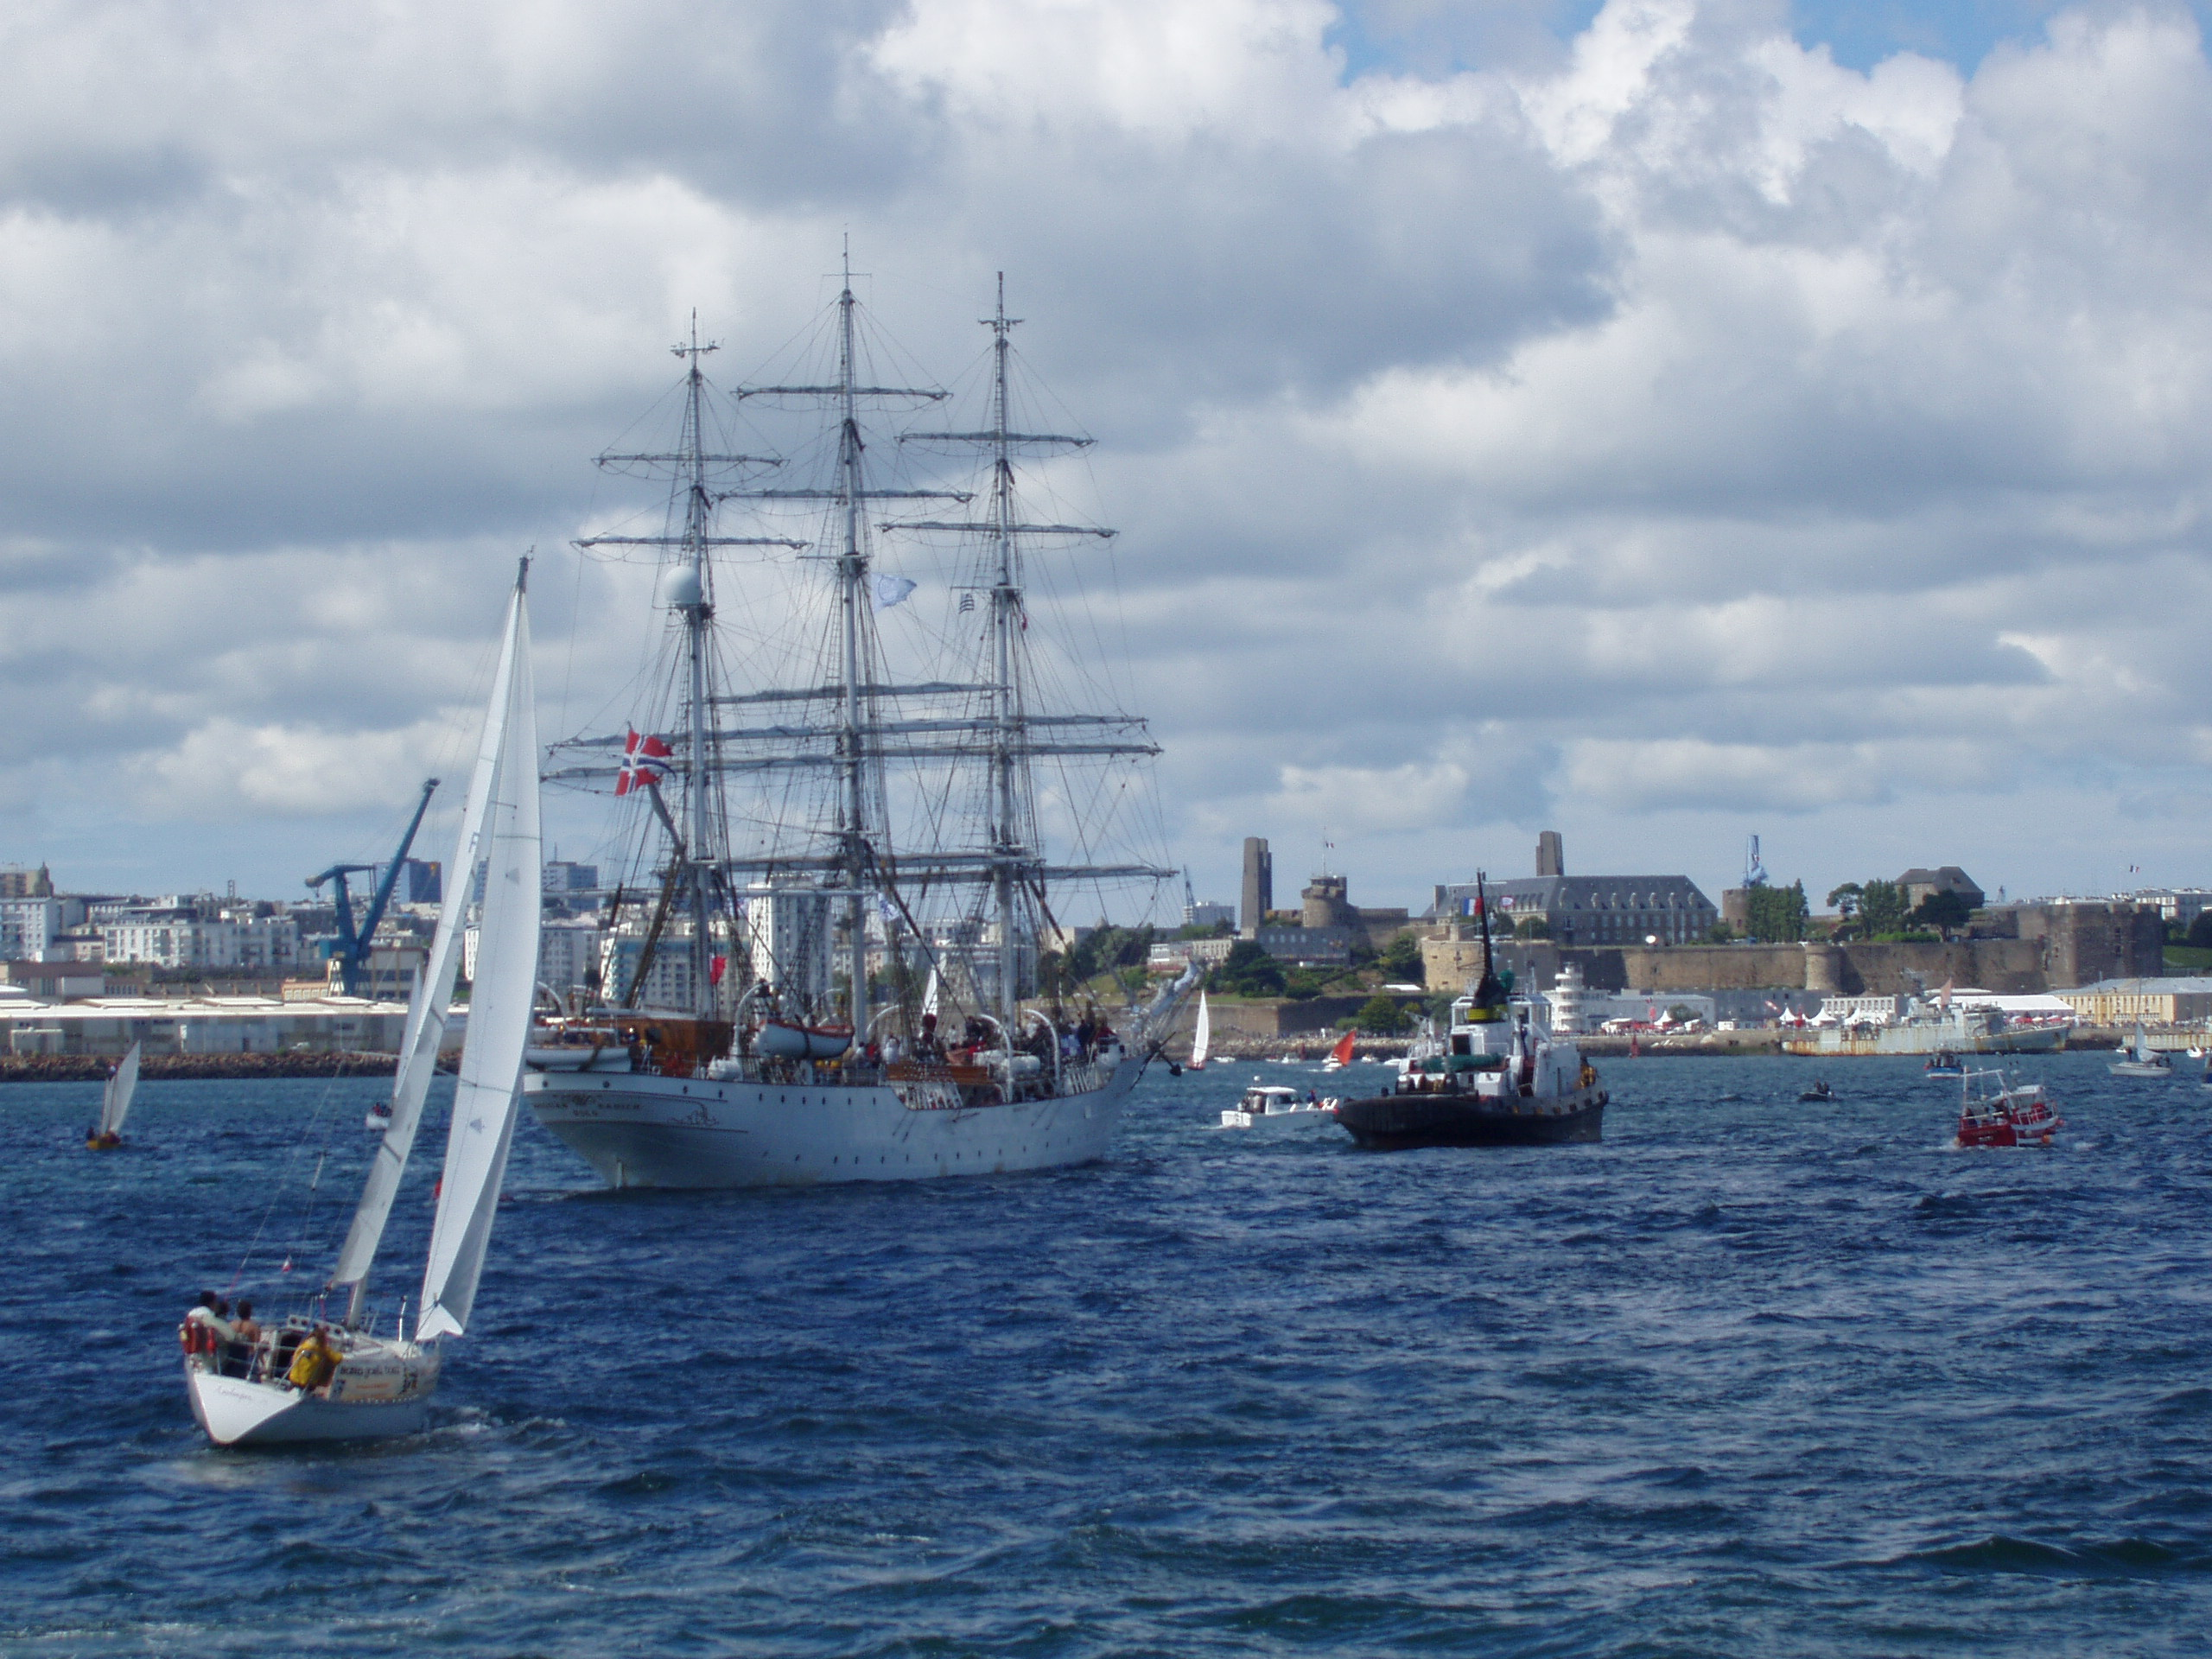

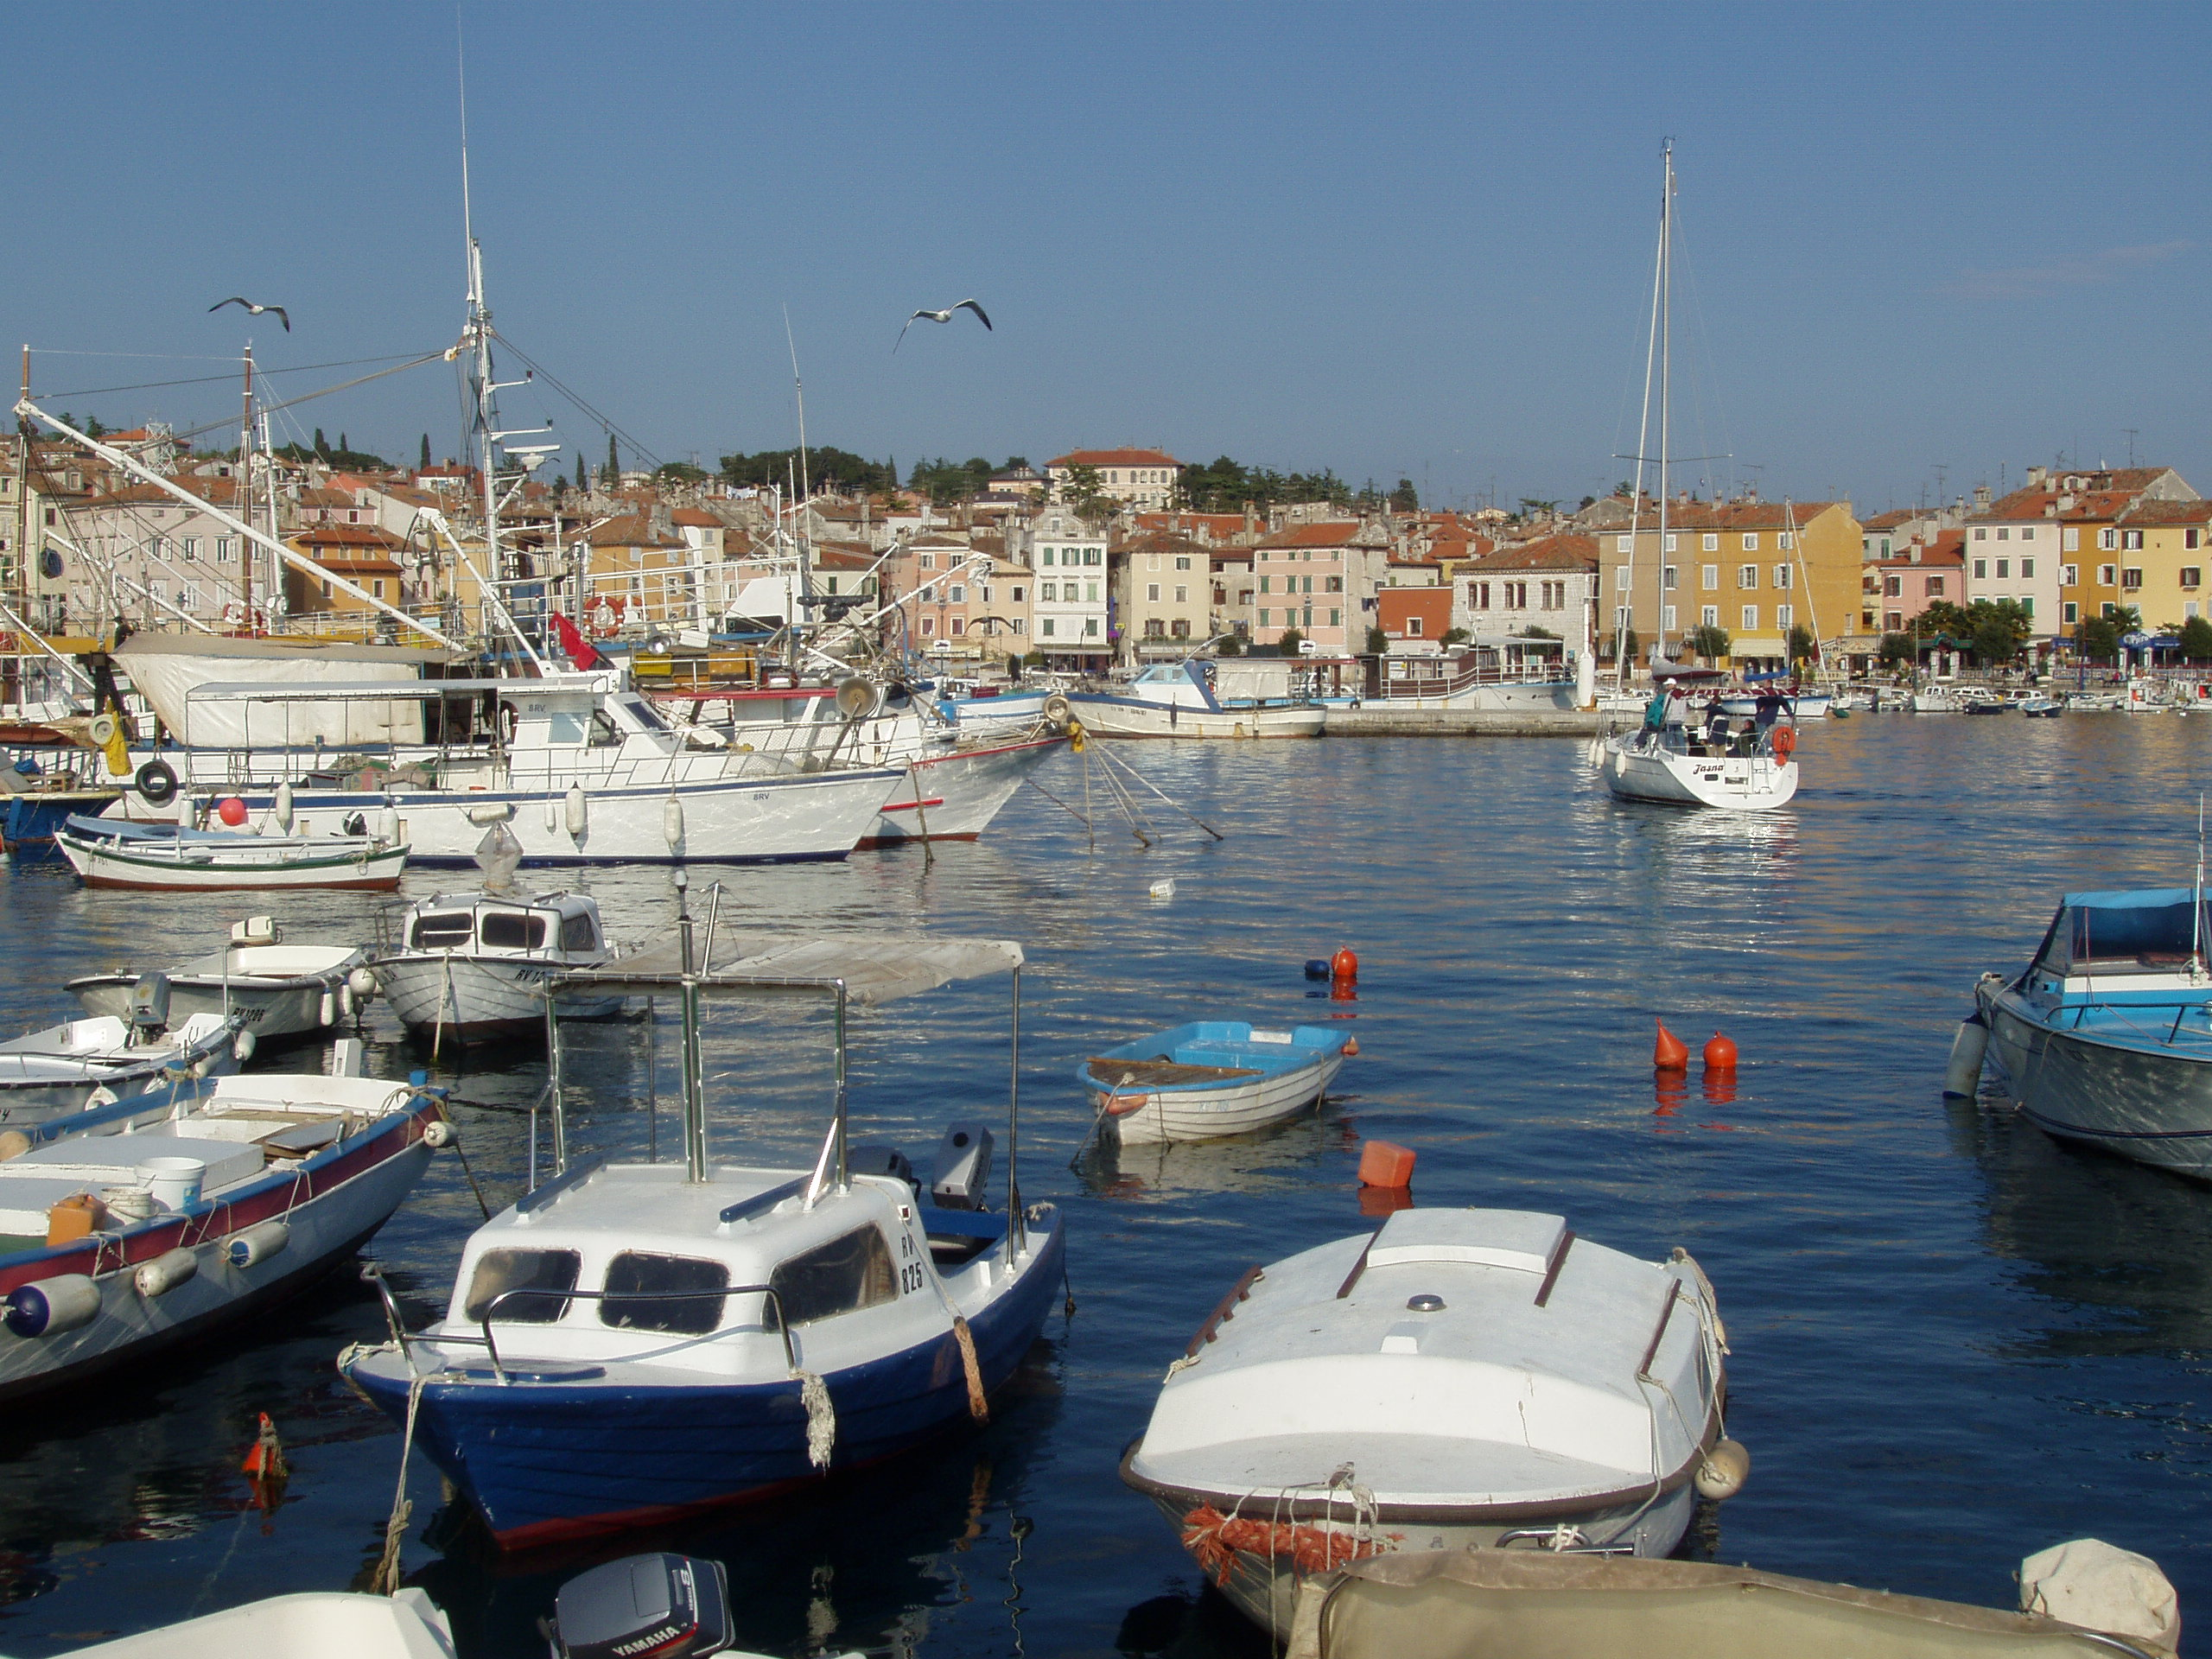

In [45]:
display(*[Image(data=b) for b in image_bytes])